## Import Library

### pada tahapan ini terdapat berbagai library yang dibutuhkan untuk mendukung identifikasi dataset dan pembuatan klasifikasi model

In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve



## Load Data

### Tahapan ini terdapat memuat sebuah dataset klasifikasi yaitu dataset kinerja dari siswa dan menampilkan beberapa isian dari data

In [2]:
# load data
data = pd.read_csv('Student_performance_data.csv')

In [3]:
# menampilkan data
data.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


## Exploratory Data Analysis

### - Pada tahapan ini terdapat identifikasi data untuk mengetahui jumlah baris dan kolom, mengetahui ada atau tidaknya missing value, identifikasi kolom numerik dan menunjukkan korelasi antar atribut
### - Melakukan plot untuk mengetahui distribusi dari variabel target, dan plot distribusi untuk hubungan antara beberapa variabel

In [4]:
# identifikasi data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


In [5]:
# indentifikasi jumlah baris dan kolom
print(f"Jumlah baris: {data.shape[0]}, Jumlah kolom: {data.shape[1]}")

Jumlah baris: 2392, Jumlah kolom: 15


In [6]:
# identifikasi missing value data
missing_values = data.isnull().sum()
missing_values[missing_values > 0]

print(f"jumlah data yang hilang: ", missing_values)

jumlah data yang hilang:  StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64


In [7]:
# analisis kolom dataset
data.describe(include="all")

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


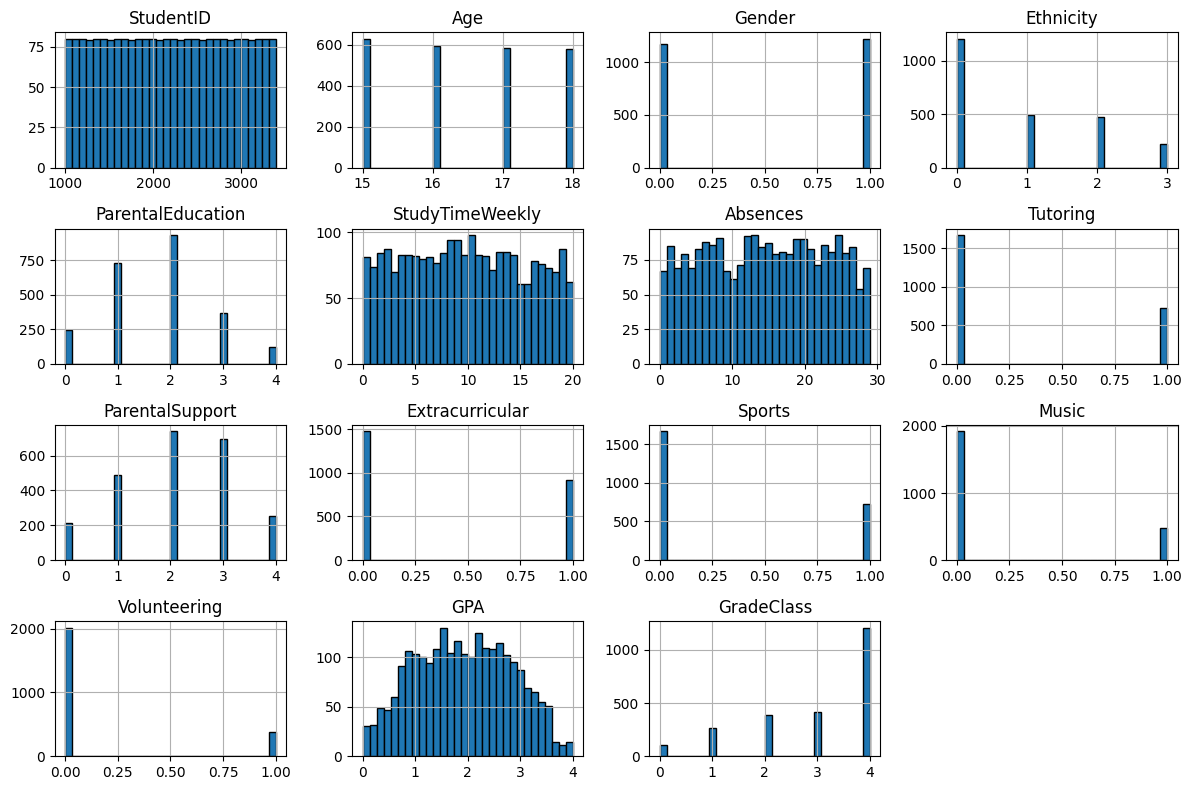

In [8]:
# identifikasi kolom numerik
kolom_numerik = data.select_dtypes(include=['int64', 'float64']).columns
data[kolom_numerik].hist(figsize=(12, 8), bins=30, edgecolor="black")
plt.tight_layout()
plt.show()

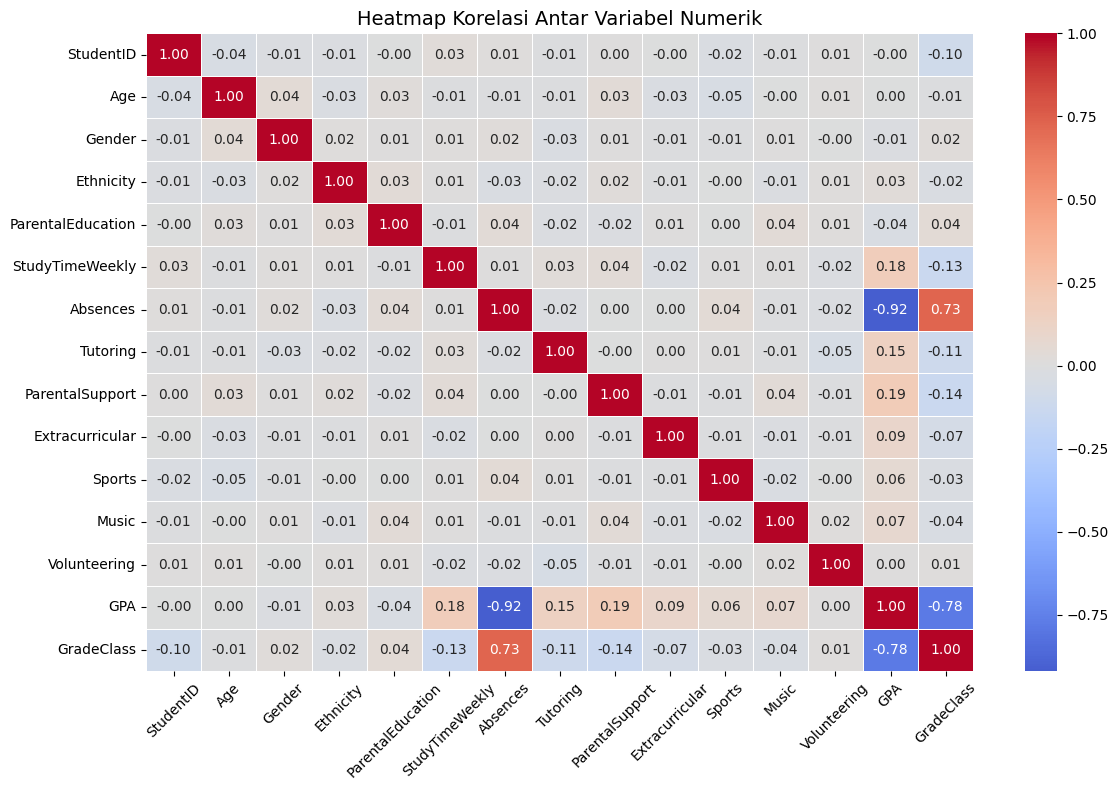

In [9]:
# Hitung korelasi antar fitur numerik
matriks_korelasi = data.corr(numeric_only=True)

# Buat plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(matriks_korelasi, annot=True, fmt=".2f", cmap='coolwarm', center=0, linewidths=0.5)
plt.title("Heatmap Korelasi Antar Variabel Numerik", fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

<ipython-input-10-2a7940587e3d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='GradeClass', palette='Set2')


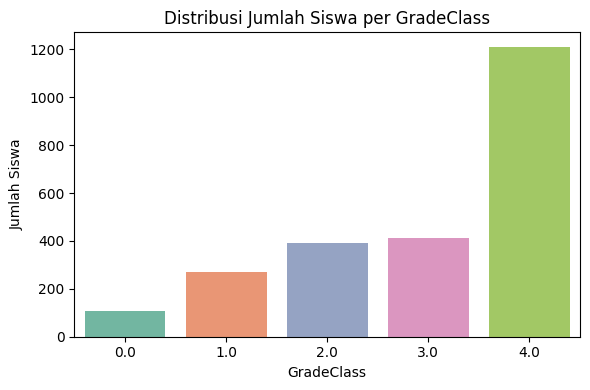

In [10]:
# Visualisasi distribusi kelas target
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='GradeClass', palette='Set2')
plt.title("Distribusi Jumlah Siswa per GradeClass")
plt.xlabel("GradeClass")
plt.ylabel("Jumlah Siswa")
plt.tight_layout()
plt.show()

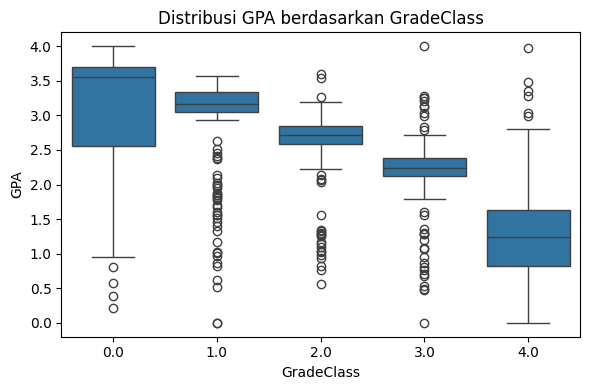

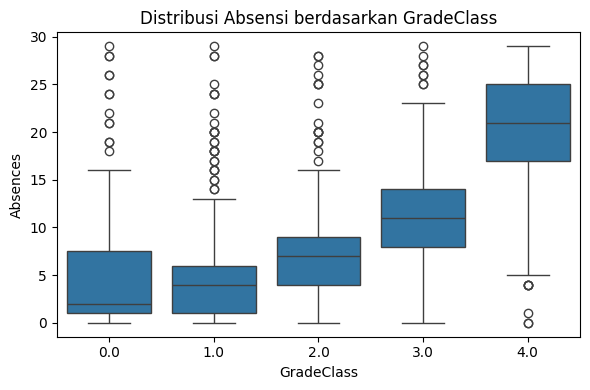

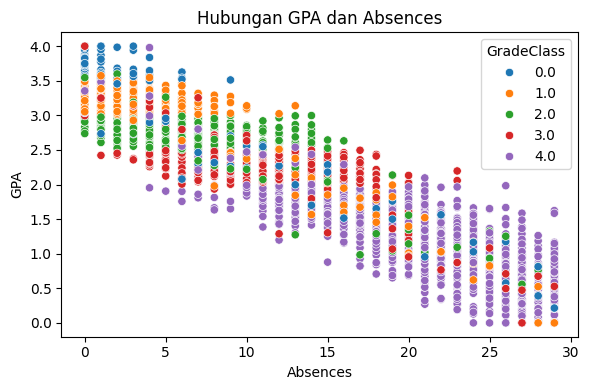

In [11]:
# Boxplot GPA berdasarkan GradeClass
plt.figure(figsize=(6, 4))
sns.boxplot(data=data, x='GradeClass', y='GPA')
plt.title("Distribusi GPA berdasarkan GradeClass")
plt.xlabel("GradeClass")
plt.ylabel("GPA")
plt.tight_layout()
plt.show()

# Boxplot Absences berdasarkan GradeClass
plt.figure(figsize=(6, 4))
sns.boxplot(data=data, x='GradeClass', y='Absences')
plt.title("Distribusi Absensi berdasarkan GradeClass")
plt.xlabel("GradeClass")
plt.ylabel("Absences")
plt.tight_layout()
plt.show()

# Scatter plot GPA vs Absences
plt.figure(figsize=(6, 4))
sns.scatterplot(data=data, x='Absences', y='GPA', hue='GradeClass', palette='tab10')
plt.title("Hubungan GPA dan Absences")
plt.xlabel("Absences")
plt.ylabel("GPA")
plt.tight_layout()
plt.show()

# Insight

- Terdapat hubungan relasi positif pada atribut Gradeclass dan Absences yaitu 0.73. - dan terdapat relasi negatif yaitu gradeclass dan GPA yaitu -.78 pada atribut GPA dan Absences yaitu -92
- Persebaran distribusi gradeclass paling banyak yaitu 4 sekitar 1200 lebih siswa, selain itu grade 0-3 relatif rendah diangka 0-400 siswa
- GradeClass 0 dan 1 memiliki nilai GPA yang lebih tinggi dan stabil, dengan median mendekati atau di atas 3.0.
- GradeClass 4 memiliki distribusi GPA paling rendah — banyak siswa dengan GPA < 2, dan beberapa di bawah 1.
- Semakin tinggi GradeClass (angka lebih besar), semakin rendah GPA siswa — sesuai harapan bahwa GradeClass 4 menunjukkan performa lebih buruk.
- GradeClass 0 dan 1 memiliki absensi lebih sedikit (median sekitar 5).
- GradeClass 4 memiliki median absensi tertinggi (~20), dan banyak outliers absensi tinggi.



# Data Preprocessing

### Pada tahapan ini terdapat cek data untuk ada atau tidaknya nilai kosong dan nilai duplikat. dan melakukan normalisasi pada dataset

In [12]:
# cek nilai kosong
print("Nilai Kosong: ")
print(data.isnull().sum())

print("\n")

# cek nilai duplikat
print("Nilai Duplikat: ")
print(data.duplicated().sum())

Nilai Kosong: 
StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64


Nilai Duplikat: 
0


In [13]:
# Buat instance MinMaxScaler
scaler = MinMaxScaler()

numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_columns.remove('GradeClass')

# Terapkan MinMaxScaler hanya ke kolom yang dipilih
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

# Tampilkan hasil
data.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,0.000000,0.666667,1.0,0.000000,0.50,0.992773,0.241379,1.0,0.50,0.0,0.0,1.0,0.0,0.732299,2.0
1,0.000418,1.000000,0.0,0.000000,0.25,0.771270,0.000000,0.0,0.25,0.0,0.0,0.0,0.0,0.760729,1.0
2,0.000836,0.000000,0.0,0.666667,0.75,0.210718,0.896552,0.0,0.50,0.0,0.0,0.0,0.0,0.028151,4.0
3,0.001255,0.666667,1.0,0.000000,0.75,0.501965,0.482759,0.0,0.75,1.0,0.0,0.0,0.0,0.513555,3.0
4,0.001673,0.666667,1.0,0.000000,0.50,0.233840,0.586207,1.0,0.75,0.0,0.0,0.0,0.0,0.322015,4.0


# Spliting data

### Pada tahapan ini terdapat pembagian data yang digunakan training dan testing sebanyak 80 dan 20

In [14]:
# pembagian label atribut dan target untuk training
X = data.drop(columns=['GradeClass'])
y = data['GradeClass']


In [15]:
# pembagian data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")

Training set shape: X_train=(1913, 14), y_train=(1913,)
Test set shape: X_test=(479, 14), y_test=(479,)


# modelling

### Pada Tahapan ini terdapat modelling dengan menggunakan algoritma random forrest

In [16]:
# modelling menggunakan randomforrest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

# Evaluasi model

### pada tahapan ini terdapat menampilkan hasil akurasi model dan perhitungan skor akurasi baik itu presisi skor, recall, dan f1 score

In [17]:
# Lakukan prediksi terhadap data test
y_pred = rf_model.predict(X_test)

In [18]:
# evaluasi skor
def perform_evaluation(estimator, X_test, y_test):
    predictions = estimator.predict(X_test)
    matrix = confusion_matrix(y_test, predictions)

    # Ambil nilai TP, FP, FN, TN hanya jika biner
    if matrix.shape == (2, 2):
        tn, fp, fn, tp = matrix.ravel()
    else:
        tn = fp = fn = tp = None  # Tidak relevan untuk multi-kelas

    evaluation_result = {
        'Confusion Matrix': matrix,
        'TP': tp,
        'FP': fp,
        'FN': fn,
        'TN': tn,
        'Accuracy Score': accuracy_score(y_test, predictions),
        'Precision Score': precision_score(y_test, predictions, average='weighted'),
        'Recall Score': recall_score(y_test, predictions, average='weighted'),
        'F1 Score': f1_score(y_test, predictions, average='weighted')
    }
    return evaluation_result

# Evaluasi model yang sudah dilatih
model_dict = {
    'Random Forest Classifier': rf_model
}

evaluation_summary = {}

for name, clf in model_dict.items():
    evaluation_summary[name] = perform_evaluation(clf, X_test, y_test)

# Buat ringkasan dalam bentuk DataFrame
report_df = pd.DataFrame([
    {
        'Model Name': key,
        'Accuracy': val['Accuracy Score'],
        'Precision': val['Precision Score'],
        'Recall': val['Recall Score'],
        'F1 Score': val['F1 Score']
    }
    for key, val in evaluation_summary.items()
])

# Cetak ringkasan
print(report_df)

                 Model Name  Accuracy  Precision    Recall  F1 Score
0  Random Forest Classifier  0.912317   0.913685  0.912317   0.90905


# visualisasi akurasi model

### pada tahapan ini terdapat menampilkan hasil visualisasi confussion matrix, hasil model yang di training dan testing model randomforrest

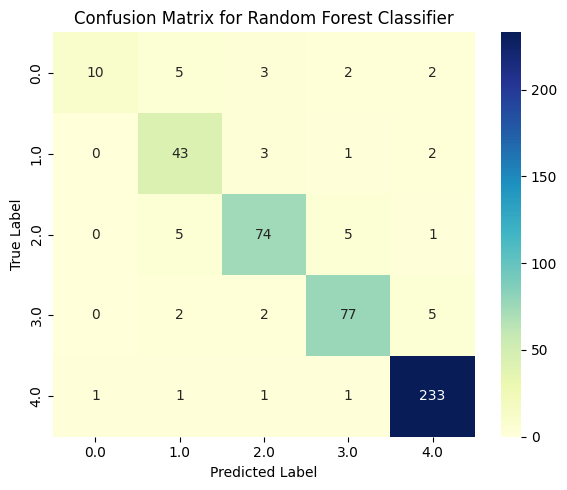

In [19]:
# Fungsi alternatif untuk memvisualisasikan confusion matrix
def visualize_conf_matrix(estimator, X_test, y_true, label="rf_model"):
    # Prediksi dari model
    predicted = estimator.predict(X_test)

    # Hitung confusion matrix
    conf_mat = confusion_matrix(y_true, predicted)

    # Buat plot heatmap
    plt.figure(figsize=(6,5))
    sns.heatmap(conf_mat, annot=True, fmt='d', cmap='YlGnBu',
                xticklabels=np.unique(y_true),
                yticklabels=np.unique(y_true))
    plt.title(f'Confusion Matrix for {label}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.show()

# Contoh penggunaan fungsi untuk beberapa model
visualize_conf_matrix(rf_model, X_test, y_test, "Random Forest Classifier")

In [20]:

def plot_learning_curve(estimator, X, y, title="Learning Curve", cv=5, scoring='accuracy'):
    train_sizes, train_scores, val_scores = learning_curve(
        estimator, X, y, cv=cv, scoring=scoring,
        train_sizes=np.linspace(0.1, 1.0, 10), random_state=42
    )

    train_mean = np.mean(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)

    train_std = np.std(train_scores, axis=1)
    val_std = np.std(val_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training Score')
    plt.plot(train_sizes, val_mean, 'o-', color='green', label='Validation Score')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
    plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color='green')

    plt.title(title)
    plt.xlabel("Training Set Size")
    plt.ylabel("Accuracy")
    plt.legend(loc='best')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

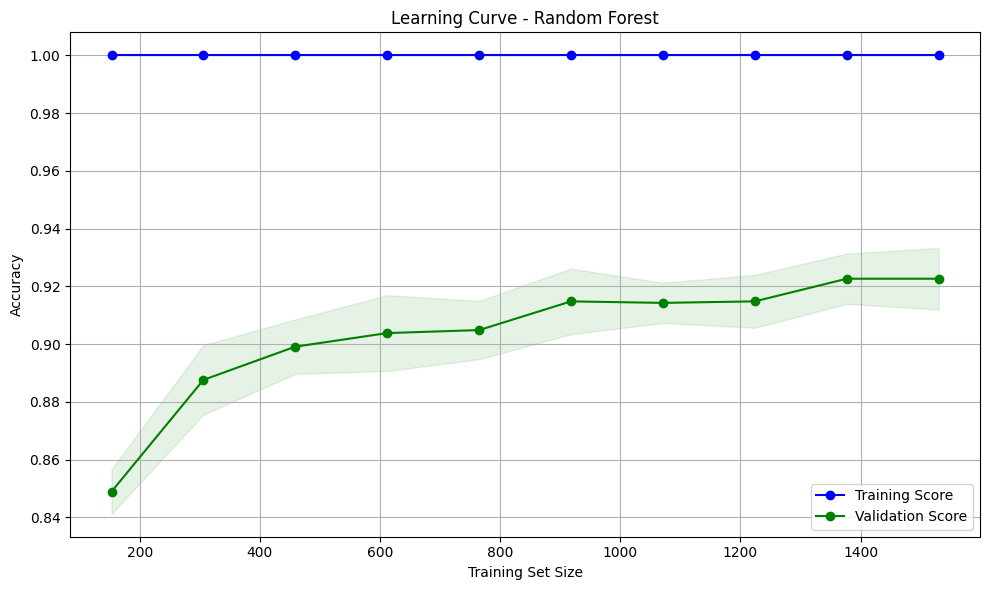

In [21]:
# Contoh pemanggilan untuk Random Forest
plot_learning_curve(rf_model, X_train, y_train, title="Learning Curve - Random Forest", cv=5)

# Hyperparameter tunning menggunakan GridSearchCV

### Pada tahapan ini , dilakukan tunning menggunakan GridSearchCV untuk mengurangi terjadi overfitting, / underfitting, dan membantu performa model lebih baik

In [22]:
# Parameter grid untuk Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inisialisasi model
rf_base = RandomForestClassifier(random_state=42)

# GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf_base,
                               param_grid=param_grid,
                               cv=5,
                               scoring='f1_weighted',
                               verbose=1,
                               n_jobs=-1)

# Fit GridSearchCV
grid_search_rf.fit(X_train, y_train)

# Ambil model terbaik
best_rf_model = grid_search_rf.best_estimator_

# Evaluasi model terbaik
y_pred_best = best_rf_model.predict(X_test)


Fitting 5 folds for each of 108 candidates, totalling 540 fits


# Visualisasi hasil tunning

### Pada tahapan Terakhir terdapat evaluasi dan visualisasi hasil dari tunning model dari GridSearchCV

In [23]:

print("Best Parameters:", grid_search_rf.best_params_)
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("Precision:", precision_score(y_test, y_pred_best, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_best, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_best, average='weighted'))

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}

Classification Report:
               precision    recall  f1-score   support

         0.0       0.91      0.45      0.61        22
         1.0       0.80      0.90      0.85        49
         2.0       0.91      0.88      0.90        85
         3.0       0.85      0.88      0.87        86
         4.0       0.96      0.98      0.97       237

    accuracy                           0.91       479
   macro avg       0.89      0.82      0.84       479
weighted avg       0.92      0.91      0.91       479

Accuracy: 0.9144050104384134
Precision: 0.9155909292263853
Recall: 0.9144050104384134
F1 Score: 0.9110796862799244


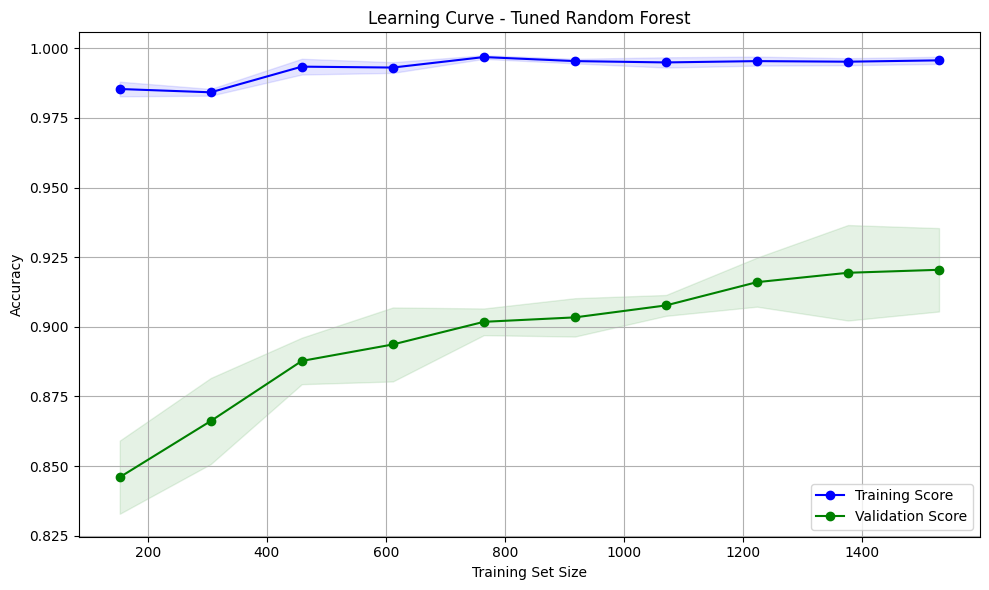

In [24]:
plot_learning_curve(best_rf_model, X_train, y_train, title="Learning Curve - Tuned Random Forest", scoring='f1_weighted')


# Insight evaluasi model

-  pada penggunaan model random forrest, menghasilkan akurasi skor 0.91 (sebelum tunning) pada saat setelah tunning tidak ada perubahan di skor 0.91
- rata rata perhitungan presisi, recall dan f1 score rata rata diangka 90% dan 91%